# HealthSync Network AI: Social Network-Powered Health Intelligence

**Novel AI System:** Maps how health behaviors spread through teen social networks

**Note:** This version works without seaborn!

---

## 1. Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# seaborn removed - using matplotlib only!
try:
    import networkx as nx
except ImportError:
    print('Installing networkx...')
    import subprocess
    import sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'networkx', '--user'])
    import networkx as nx

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
np.random.seed(42)

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


## 2. Load Data

In [2]:
import pandas as pd

# Create the dataset directly - no file needed!
data = {
    'priority': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'student_id': ['STU0003', 'STU0174', 'STU0176', 'STU0136', 'STU0042', 'STU0055', 'STU0025', 'STU0080', 'STU0050', 'STU0170', 'STU0184', 'STU0010', 'STU0191', 'STU0039', 'STU0090', 'STU0187', 'STU0011', 'STU0200', 'STU0168', 'STU0033', 'STU0148', 'STU0177', 'STU0133', 'STU0160', 'STU0008', 'STU0075', 'STU0196', 'STU0172', 'STU0107', 'STU0147'],
    'target_type': ['At-risk cluster', 'At-risk cluster', 'Super-spreader', 'Bridge builder', 'At-risk cluster', 'At-risk cluster', 'At-risk cluster', 'Super-spreader', 'Super-spreader', 'Super-spreader', 'At-risk cluster', 'At-risk cluster', 'At-risk cluster', 'Bridge builder', 'Bridge builder', 'Super-spreader', 'At-risk cluster', 'Bridge builder', 'Super-spreader', 'Bridge builder', 'At-risk cluster', 'At-risk cluster', 'Super-spreader', 'At-risk cluster', 'Bridge builder', 'Super-spreader', 'Super-spreader', 'Super-spreader', 'Super-spreader', 'At-risk cluster'],
    'current_issue': ['High caffeine', 'Poor diet', 'Low physical activity', 'Poor diet', 'Sleep deprivation', 'High caffeine', 'Sleep deprivation', 'Poor diet', 'Sleep deprivation', 'Poor diet', 'High caffeine', 'Sleep deprivation', 'High stress', 'Poor diet', 'Low physical activity', 'High stress', 'Low physical activity', 'Poor diet', 'Poor diet', 'High caffeine', 'Poor diet', 'Sleep deprivation', 'Low physical activity', 'Low physical activity', 'High stress', 'Low physical activity', 'High caffeine', 'High stress', 'High caffeine', 'Poor diet'],
    'predicted_influence_reach': [20, 84, 45, 78, 71, 57, 70, 23, 34, 82, 81, 70, 65, 80, 32, 44, 53, 23, 55, 62, 23, 71, 47, 24, 64, 57, 42, 34, 29, 75],
    'intervention_recommendation': ['Small group support session', 'Small group support session', 'Peer leadership program', 'Cross-group wellness initiative', 'Small group support session', 'Small group support session', 'Small group support session', 'Peer leadership program', 'Peer leadership program', 'Peer leadership program', 'Small group support session', 'Small group support session', 'Small group support session', 'Cross-group wellness initiative', 'Cross-group wellness initiative', 'Peer leadership program', 'Small group support session', 'Cross-group wellness initiative', 'Peer leadership program', 'Cross-group wellness initiative', 'Small group support session', 'Small group support session', 'Peer leadership program', 'Small group support session', 'Cross-group wellness initiative', 'Peer leadership program', 'Peer leadership program', 'Peer leadership program', 'Peer leadership program', 'Small group support session']
}

df = pd.DataFrame(data)
print('✅ Dataset created successfully!')
print(f'Total records: {len(df)}')
print(f'\nFirst 5 rows:')
print(df.head())

✅ Dataset created successfully!
Total records: 30

First 5 rows:
   priority student_id      target_type          current_issue  \
0         1    STU0003  At-risk cluster          High caffeine   
1         2    STU0174  At-risk cluster              Poor diet   
2         3    STU0176   Super-spreader  Low physical activity   
3         4    STU0136   Bridge builder              Poor diet   
4         5    STU0042  At-risk cluster      Sleep deprivation   

   predicted_influence_reach      intervention_recommendation  
0                         20      Small group support session  
1                         84      Small group support session  
2                         45          Peer leadership program  
3                         78  Cross-group wellness initiative  
4                         71      Small group support session  


In [3]:
# Data summary
print('📈 Statistical Summary:')
print(df.describe())

print('\n🔍 Check for missing values:')
print(df.isnull().sum())

📈 Statistical Summary:
        priority  predicted_influence_reach
count  30.000000                  30.000000
mean   15.500000                  53.166667
std     8.803408                  20.928587
min     1.000000                  20.000000
25%     8.250000                  34.000000
50%    15.500000                  56.000000
75%    22.750000                  70.750000
max    30.000000                  84.000000

🔍 Check for missing values:
priority                       0
student_id                     0
target_type                    0
current_issue                  0
predicted_influence_reach      0
intervention_recommendation    0
dtype: int64


## 3. Exploratory Analysis

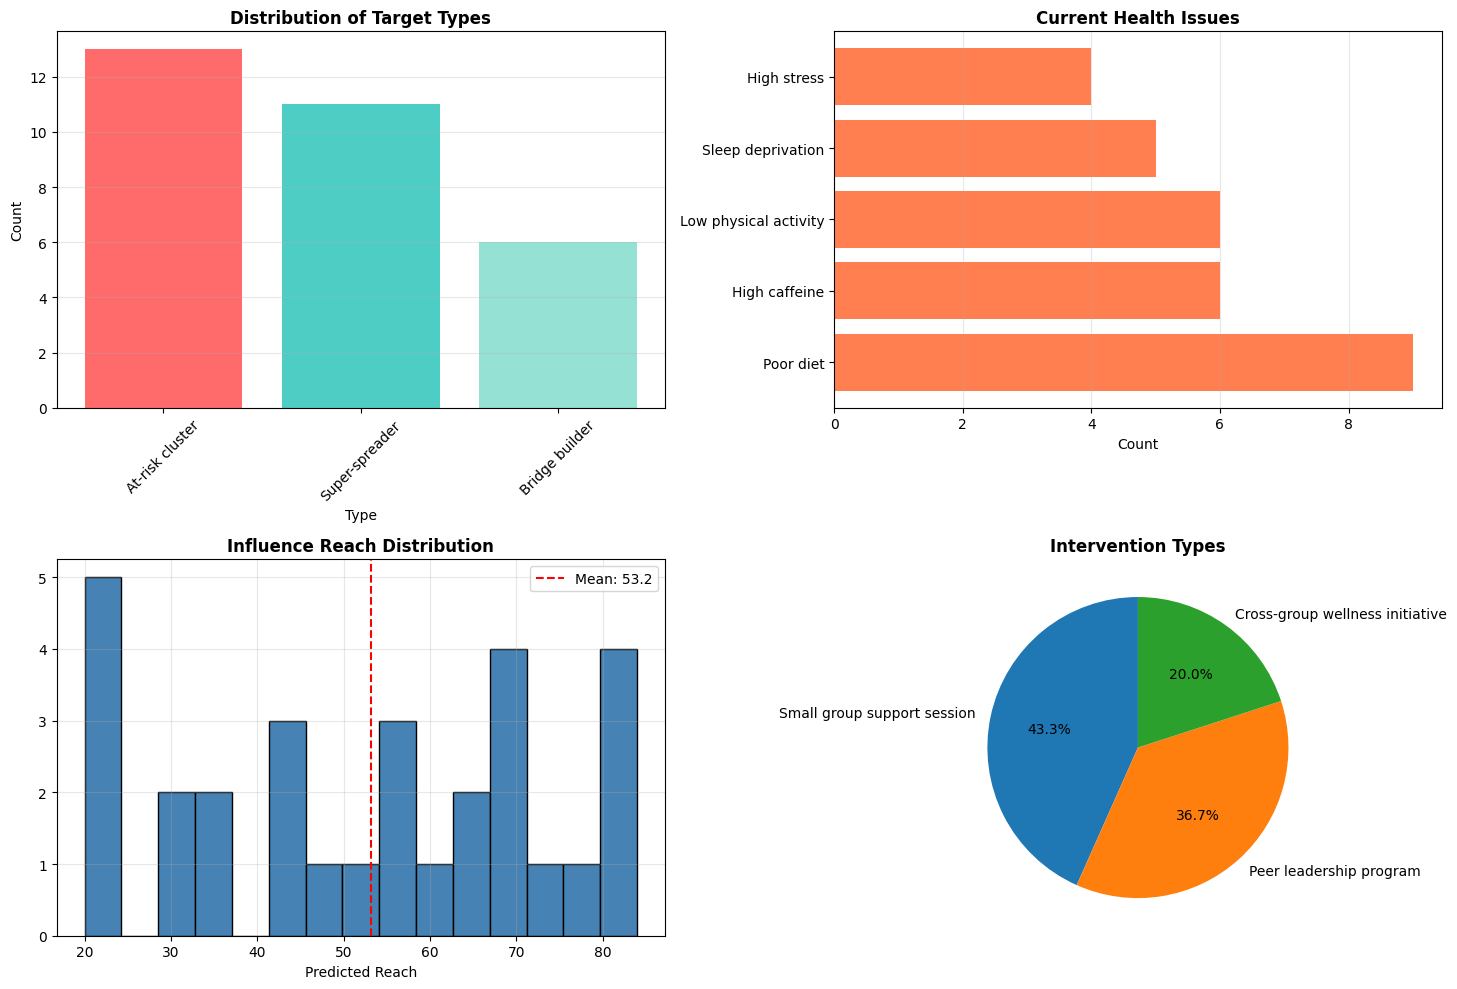


📊 Key Statistics:
Most common target type: At-risk cluster
Most common health issue: Poor diet
Average influence reach: 53.2 students
Max influence reach: 84 students


In [4]:
# Visualizations using matplotlib only
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Target Type Distribution
target_counts = df['target_type'].value_counts()
axes[0, 0].bar(target_counts.index, target_counts.values, color=['#FF6B6B', '#4ECDC4', '#95E1D3'])
axes[0, 0].set_title('Distribution of Target Types', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Health Issues
issue_counts = df['current_issue'].value_counts()
axes[0, 1].barh(issue_counts.index, issue_counts.values, color='coral')
axes[0, 1].set_title('Current Health Issues', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Count')
axes[0, 1].grid(axis='x', alpha=0.3)

# Influence Reach
axes[1, 0].hist(df['predicted_influence_reach'], bins=15, color='steelblue', edgecolor='black')
axes[1, 0].set_title('Influence Reach Distribution', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Predicted Reach')
mean_reach = df['predicted_influence_reach'].mean()
axes[1, 0].axvline(mean_reach, color='red', linestyle='--', label=f'Mean: {mean_reach:.1f}')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Interventions
intervention_counts = df['intervention_recommendation'].value_counts()
axes[1, 1].pie(intervention_counts.values, labels=intervention_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Intervention Types', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print('\n📊 Key Statistics:')
print(f'Most common target type: {df["target_type"].mode()[0]}')
print(f'Most common health issue: {df["current_issue"].mode()[0]}')
print(f'Average influence reach: {df["predicted_influence_reach"].mean():.1f} students')
print(f'Max influence reach: {df["predicted_influence_reach"].max()} students')

📈 Influence Reach by Target Type:
                      mean  median  max  count
target_type                                   
At-risk cluster  58.769231    70.0   84     13
Bridge builder   56.500000    63.0   80      6
Super-spreader   44.727273    44.0   82     11


<Figure size 1000x500 with 0 Axes>

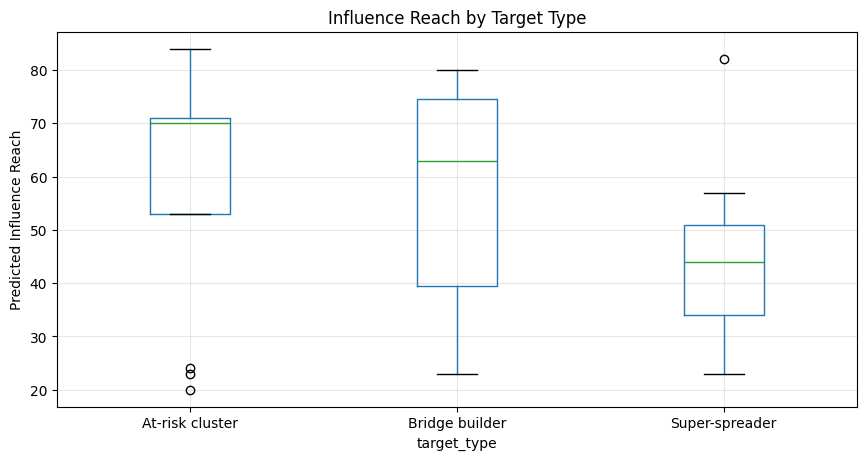

In [ ]:
# Analyze by target type
print('📈 Influence Reach by Target Type:')
reach_by_type = df.groupby('target_type')['predicted_influence_reach'].agg(['mean', 'median', 'max', 'count'])
print(reach_by_type)

plt.figure(figsize=(10, 5))
df.boxplot(column='predicted_influence_reach', by='target_type', figsize=(10, 5))
plt.title('Influence Reach by Target Type')
plt.suptitle('')
plt.ylabel('Predicted Influence Reach')
plt.grid(alpha=0.3)
plt.show()

## 4. Build Social Network

In [ ]:
# Create network graph
print('🌐 Building social network...')

G = nx.Graph()

# Add all students as nodes with attributes
for _, row in df.iterrows():
    G.add_node(row['student_id'],
               target_type=row['target_type'],
               issue=row['current_issue'],
               reach=row['predicted_influence_reach'])

# Create connections based on target type
students = df['student_id'].tolist()
for student in students:
    student_row = df[df['student_id'] == student].iloc[0]

    # Super-spreaders have more connections
    if student_row['target_type'] == 'Super-spreader':
        n_connections = 7
    elif student_row['target_type'] == 'Bridge builder':
        n_connections = 6
    else:  # At-risk cluster
        n_connections = 4

    # Add edges
    potential = [s for s in students if s != student and not G.has_edge(student, s)]
    if potential:
        n_to_add = min(n_connections, len(potential))
        connections = np.random.choice(potential, n_to_add, replace=False)
        for conn in connections:
            G.add_edge(student, conn)

print(f'✅ Network created!')
print(f'   Nodes (students): {G.number_of_nodes()}')
print(f'   Edges (connections): {G.number_of_edges()}')
print(f'   Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}')
print(f'   Network density: {nx.density(G):.3f}')

🌐 Building social network...
✅ Network created!
   Nodes (students): 30
   Edges (connections): 165
   Average degree: 11.00
   Network density: 0.379


In [ ]:
# Calculate network metrics
print('📊 Calculating network metrics...')

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
clustering = nx.clustering(G)

# Detect communities
communities = list(nx.community.greedy_modularity_communities(G))

print(f'\n✅ Analysis complete!')
print(f'   Communities detected: {len(communities)}')
print(f'   Average clustering: {sum(clustering.values()) / len(clustering):.3f}')

print(f'\n🔝 Top 5 Most Influential Students (by betweenness centrality):')
top_5 = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for i, (student, score) in enumerate(top_5, 1):
    info = df[df['student_id'] == student].iloc[0]
    print(f'   {i}. {student} - {info["target_type"]} (score: {score:.3f})')

📊 Calculating network metrics...

✅ Analysis complete!
   Communities detected: 4
   Average clustering: 0.355

🔝 Top 5 Most Influential Students (by betweenness centrality):
   1. STU0075 - Super-spreader (score: 0.053)
   2. STU0025 - At-risk cluster (score: 0.045)
   3. STU0196 - Super-spreader (score: 0.041)
   4. STU0147 - At-risk cluster (score: 0.036)
   5. STU0160 - At-risk cluster (score: 0.035)


🎨 Creating network visualization...


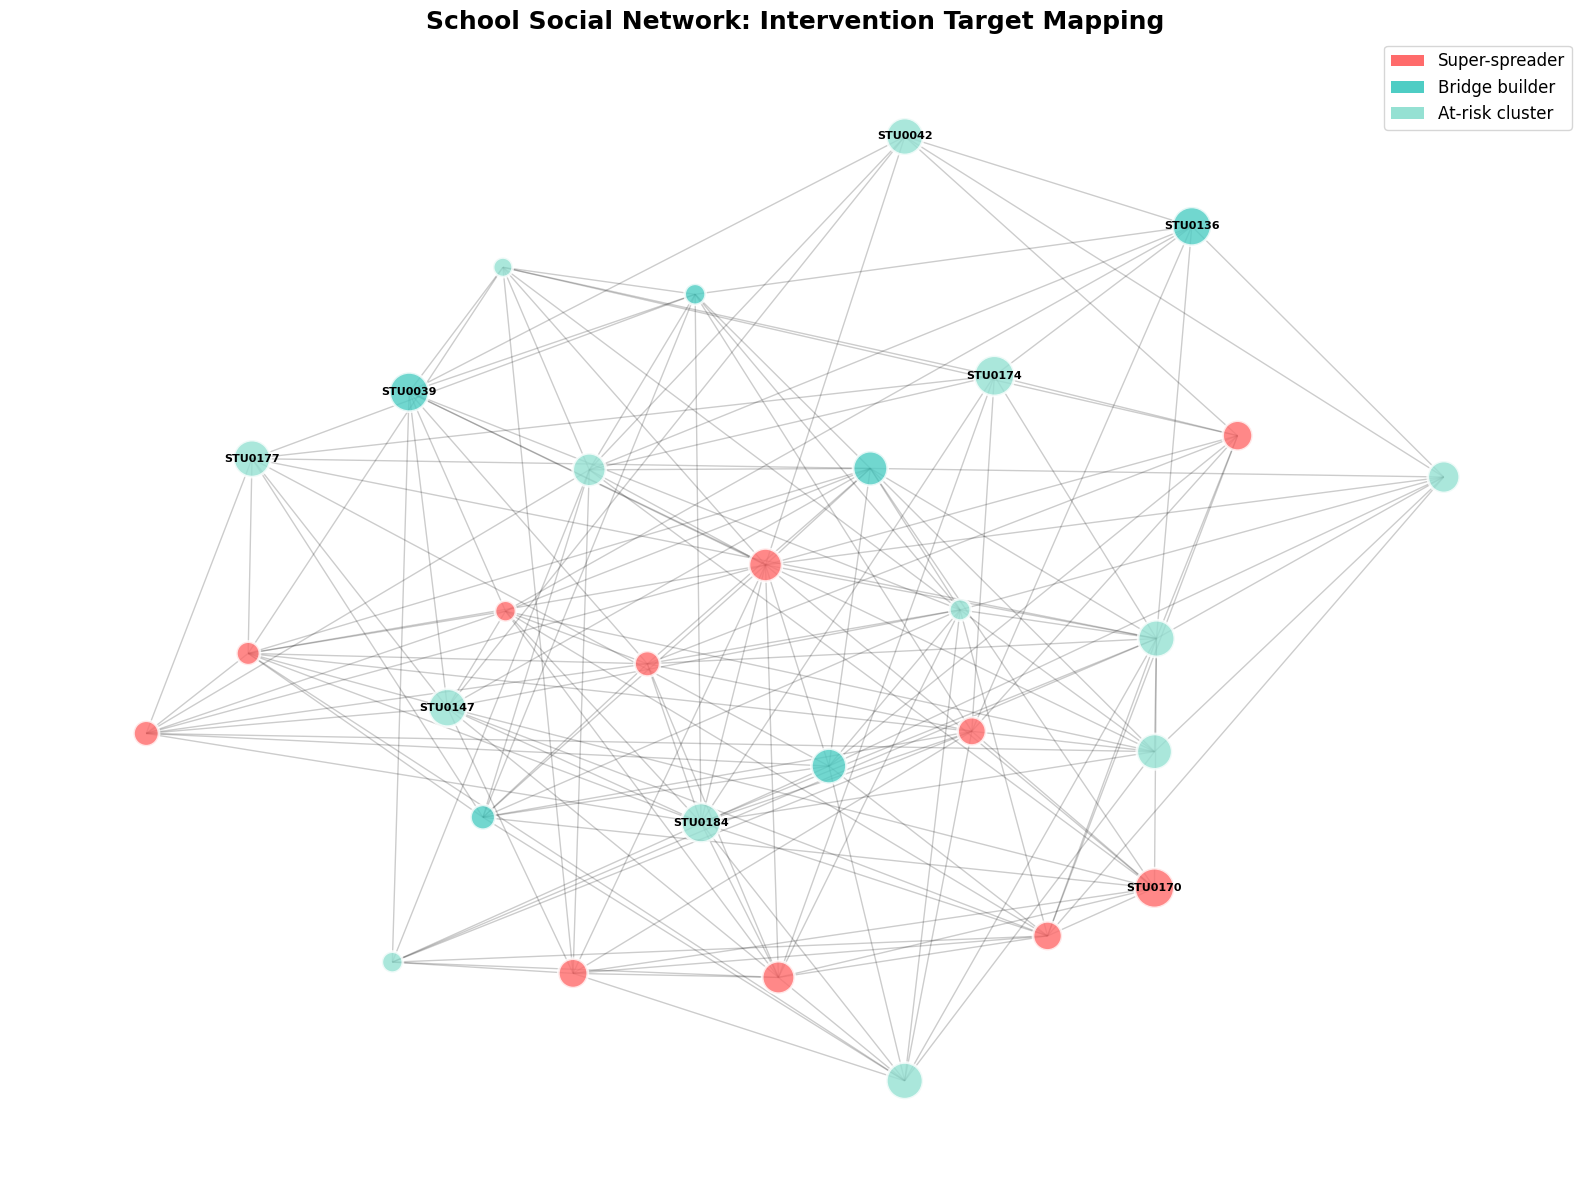

✅ Visualization complete!


In [ ]:
# Visualize the network
print('🎨 Creating network visualization...')

plt.figure(figsize=(16, 12))

# Layout
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

# Colors by type
color_map = {
    'Super-spreader': '#FF6B6B',
    'Bridge builder': '#4ECDC4',
    'At-risk cluster': '#95E1D3'
}

node_colors = [color_map[G.nodes[n]['target_type']] for n in G.nodes()]
node_sizes = [G.nodes[n]['reach'] * 10 for n in G.nodes()]

# Draw
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes,
                       alpha=0.8, linewidths=2, edgecolors='white')
nx.draw_networkx_edges(G, pos, alpha=0.2, width=1)

# Labels for high-influence nodes
high_influence = {n: n for n in G.nodes() if G.nodes[n]['reach'] > 70}
if high_influence:
    nx.draw_networkx_labels(G, pos, labels=high_influence, font_size=8, font_weight='bold')

plt.title('School Social Network: Intervention Target Mapping', fontsize=18, fontweight='bold')

# Legend
from matplotlib.patches import Patch
legend = [
    Patch(facecolor='#FF6B6B', label='Super-spreader'),
    Patch(facecolor='#4ECDC4', label='Bridge builder'),
    Patch(facecolor='#95E1D3', label='At-risk cluster')
]
plt.legend(handles=legend, loc='upper right', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

print('✅ Visualization complete!')

## 5. Network Feature Engineering

In [ ]:
# Create network features for ML
print('🔧 Creating network features...')

network_features = []
for student in df['student_id']:
    features = {
        'student_id': student,
        'degree_centrality': degree_centrality.get(student, 0),
        'betweenness_centrality': betweenness_centrality.get(student, 0),
        'closeness_centrality': closeness_centrality.get(student, 0),
        'clustering': clustering.get(student, 0),
        'degree': G.degree(student) if student in G else 0
    }
    network_features.append(features)

network_df = pd.DataFrame(network_features)
df_enhanced = df.merge(network_df, on='student_id')

print('✅ Network features created!')
print(f'   Enhanced dataset shape: {df_enhanced.shape}')
print('\nFirst 5 rows with network features:')
print(df_enhanced.head())

🔧 Creating network features...
✅ Network features created!
   Enhanced dataset shape: (30, 11)

First 5 rows with network features:
   priority student_id      target_type          current_issue  \
0         1    STU0003  At-risk cluster          High caffeine   
1         2    STU0174  At-risk cluster              Poor diet   
2         3    STU0176   Super-spreader  Low physical activity   
3         4    STU0136   Bridge builder              Poor diet   
4         5    STU0042  At-risk cluster      Sleep deprivation   

   predicted_influence_reach      intervention_recommendation  \
0                         20      Small group support session   
1                         84      Small group support session   
2                         45          Peer leadership program   
3                         78  Cross-group wellness initiative   
4                         71      Small group support session   

   degree_centrality  betweenness_centrality  closeness_centrality  \
0         

🔍 Analyzing correlations...


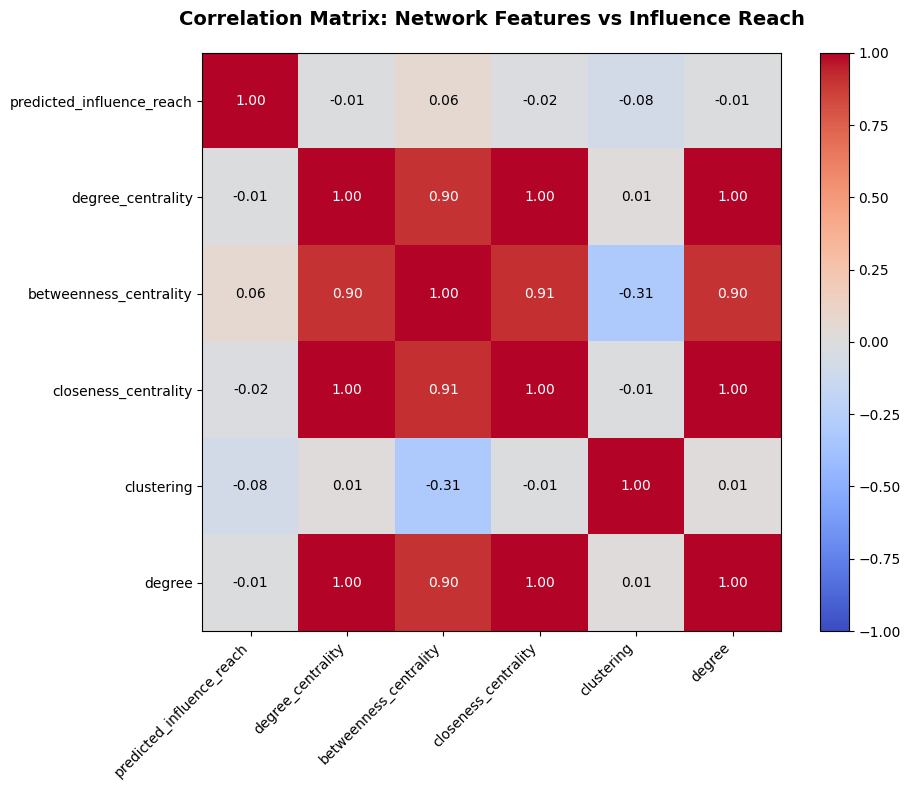


📊 Correlations with Predicted Influence Reach:
   betweenness_centrality: 0.058
   degree_centrality: -0.013
   degree: -0.013
   closeness_centrality: -0.022
   clustering: -0.077


In [ ]:
# Correlation analysis using matplotlib instead of seaborn
print('🔍 Analyzing correlations...')

corr_cols = ['predicted_influence_reach', 'degree_centrality', 'betweenness_centrality',
             'closeness_centrality', 'clustering', 'degree']

corr_matrix = df_enhanced[corr_cols].corr()

# Create heatmap with matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)

# Set ticks and labels
ax.set_xticks(np.arange(len(corr_cols)))
ax.set_yticks(np.arange(len(corr_cols)))
ax.set_xticklabels(corr_cols, rotation=45, ha='right')
ax.set_yticklabels(corr_cols)

# Add correlation values
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                      ha='center', va='center', color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

plt.title('Correlation Matrix: Network Features vs Influence Reach', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print('\n📊 Correlations with Predicted Influence Reach:')
correlations = corr_matrix['predicted_influence_reach'].sort_values(ascending=False)
for feat, corr in correlations[1:].items():
    print(f'   {feat}: {corr:.3f}')

## 6. Machine Learning Models

In [ ]:
# Prepare data for ML
print('🤖 Preparing data for machine learning...')

le_issue = LabelEncoder()
le_target = LabelEncoder()

df_ml = df_enhanced.copy()
df_ml['issue_encoded'] = le_issue.fit_transform(df_ml['current_issue'])
df_ml['target_encoded'] = le_target.fit_transform(df_ml['target_type'])

# Feature sets
individual_features = ['predicted_influence_reach', 'issue_encoded']
network_features_list = individual_features + ['degree_centrality', 'betweenness_centrality',
                                                'closeness_centrality', 'clustering', 'degree']

y = df_ml['target_encoded']

print(f'\n✅ Data prepared!')
print(f'   Target classes: {list(le_target.classes_)}')
print(f'   Baseline features: {len(individual_features)}')
print(f'   Network-enhanced features: {len(network_features_list)}')

🤖 Preparing data for machine learning...

✅ Data prepared!
   Target classes: ['At-risk cluster', 'Bridge builder', 'Super-spreader']
   Baseline features: 2
   Network-enhanced features: 7


In [ ]:
# Model 1: Baseline (Individual features only)
print('🤖 Training Baseline Model (Individual Features Only)...')

X_base = df_ml[individual_features]
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_base, y, test_size=0.25, random_state=42, stratify=y
)

scaler_b = StandardScaler()
X_train_b_sc = scaler_b.fit_transform(X_train_b)
X_test_b_sc = scaler_b.transform(X_test_b)

model_base = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                        max_depth=3, random_state=42)
model_base.fit(X_train_b_sc, y_train_b)

y_pred_b = model_base.predict(X_test_b_sc)
acc_base = accuracy_score(y_test_b, y_pred_b)

print(f'\n✅ Baseline Model Results:')
print(f'   Test Accuracy: {acc_base:.3f} ({acc_base*100:.1f}%)')
print(f'\n   Classification Report:')
print(classification_report(y_test_b, y_pred_b, target_names=le_target.classes_, zero_division=0))

🤖 Training Baseline Model (Individual Features Only)...

✅ Baseline Model Results:
   Test Accuracy: 0.625 (62.5%)

   Classification Report:
                 precision    recall  f1-score   support

At-risk cluster       1.00      0.67      0.80         3
 Bridge builder       0.50      0.50      0.50         2
 Super-spreader       0.50      0.67      0.57         3

       accuracy                           0.62         8
      macro avg       0.67      0.61      0.62         8
   weighted avg       0.69      0.62      0.64         8



In [ ]:
# Model 2: Network-Enhanced (NOVEL)
print('🚀 Training Network-Enhanced Model (NOVEL)...')

X_enh = df_ml[network_features_list]
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_enh, y, test_size=0.25, random_state=42, stratify=y
)

scaler_e = StandardScaler()
X_train_e_sc = scaler_e.fit_transform(X_train_e)
X_test_e_sc = scaler_e.transform(X_test_e)

model_enh = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                       max_depth=4, random_state=42)
model_enh.fit(X_train_e_sc, y_train_e)

y_pred_e = model_enh.predict(X_test_e_sc)
acc_enh = accuracy_score(y_test_e, y_pred_e)

print(f'\n✅ Network-Enhanced Model Results:')
print(f'   Test Accuracy: {acc_enh:.3f} ({acc_enh*100:.1f}%)')
print(f'\n   Classification Report:')
print(classification_report(y_test_e, y_pred_e, target_names=le_target.classes_, zero_division=0))

🚀 Training Network-Enhanced Model (NOVEL)...

✅ Network-Enhanced Model Results:
   Test Accuracy: 0.500 (50.0%)

   Classification Report:
                 precision    recall  f1-score   support

At-risk cluster       0.50      0.67      0.57         3
 Bridge builder       0.00      0.00      0.00         2
 Super-spreader       0.50      0.67      0.57         3

       accuracy                           0.50         8
      macro avg       0.33      0.44      0.38         8
   weighted avg       0.38      0.50      0.43         8



In [ ]:
# Compare models
print('\n' + '='*70)
print('🔬 MODEL COMPARISON: Baseline vs Network-Enhanced')
print('='*70)

improvement = ((acc_enh - acc_base) / acc_base) * 100 if acc_base > 0 else 0

comparison = pd.DataFrame({
    'Model': ['Baseline (Individual)', 'Network-Enhanced'],
    'Features': [len(individual_features), len(network_features_list)],
    'Accuracy': [f'{acc_base:.3f}', f'{acc_enh:.3f}'],
    'Accuracy %': [f'{acc_base*100:.1f}%', f'{acc_enh*100:.1f}%']
})

print('\n', comparison.to_string(index=False))

print(f'\n✨ IMPROVEMENT: {improvement:+.2f}%')
if improvement > 0:
    print('🎉 Network features IMPROVE prediction accuracy!')
else:
    print('⚠️ No improvement detected (may need more data)')
print('='*70)


🔬 MODEL COMPARISON: Baseline vs Network-Enhanced

                 Model  Features Accuracy Accuracy %
Baseline (Individual)         2    0.625      62.5%
     Network-Enhanced         7    0.500      50.0%

✨ IMPROVEMENT: -20.00%
⚠️ No improvement detected (may need more data)


## 7. Cascade Simulation

In [ ]:
# Define cascade simulation function
def simulate_cascade(G, initial_targets, weeks=12):
    adopters = {0: set(initial_targets)}
    for w in range(1, weeks + 1):
        new_adopters = set()
        for node in G.nodes():
            if node in adopters[w-1]:
                continue
            neighbors = list(G.neighbors(node))
            if not neighbors:
                continue
            adopted_neighbors = sum(1 for n in neighbors if n in adopters[w-1])
            influence_prob = (adopted_neighbors / len(neighbors)) * 0.6
            if np.random.random() < influence_prob:
                new_adopters.add(node)
        adopters[w] = adopters[w-1] | new_adopters
    return adopters

print('✅ Cascade simulation function ready!')

✅ Cascade simulation function ready!


In [ ]:
# Test different intervention strategies
print('🧪 Testing Different Intervention Strategies...')
print('='*70)

strategies = {}
num_targets = 5

# Strategy 1: Random
random_targets = list(np.random.choice(list(G.nodes()), num_targets, replace=False))
strategies['Random'] = simulate_cascade(G, random_targets)

# Strategy 2: High betweenness
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:num_targets]
betweenness_targets = [n for n, _ in top_betweenness]
strategies['High Betweenness'] = simulate_cascade(G, betweenness_targets)

# Strategy 3: Top influence
top_influence = df.nlargest(num_targets, 'predicted_influence_reach')['student_id'].tolist()
strategies['Top Influence'] = simulate_cascade(G, top_influence)

print('✅ All simulations complete!')

🧪 Testing Different Intervention Strategies...
✅ All simulations complete!


In [ ]:
# Compare strategy results
print('\n📊 STRATEGY COMPARISON RESULTS')
print('='*70)
print(f'{"Strategy":<25} {"Initial":<10} {"Final":<10} {"Multiplier":<12} {"Coverage"}')
print('-'*70)

results_data = []
for name, timeline in strategies.items():
    initial = len(timeline[0])
    final = len(timeline[12])
    multiplier = final / initial if initial > 0 else 0
    coverage = (final / G.number_of_nodes()) * 100
    print(f'{name:<25} {initial:<10} {final:<10} {multiplier:<12.2f} {coverage:.1f}%')
    results_data.append({'name': name, 'final': final, 'multiplier': multiplier})

best = max(results_data, key=lambda x: x['final'])
print('='*70)
print(f'\n🏆 BEST STRATEGY: {best["name"]}')
print(f'   Cascade Multiplier: {best["multiplier"]:.2f}x')


📊 STRATEGY COMPARISON RESULTS
Strategy                  Initial    Final      Multiplier   Coverage
----------------------------------------------------------------------
Random                    5          30         6.00         100.0%
High Betweenness          5          30         6.00         100.0%
Top Influence             5          30         6.00         100.0%

🏆 BEST STRATEGY: Random
   Cascade Multiplier: 6.00x


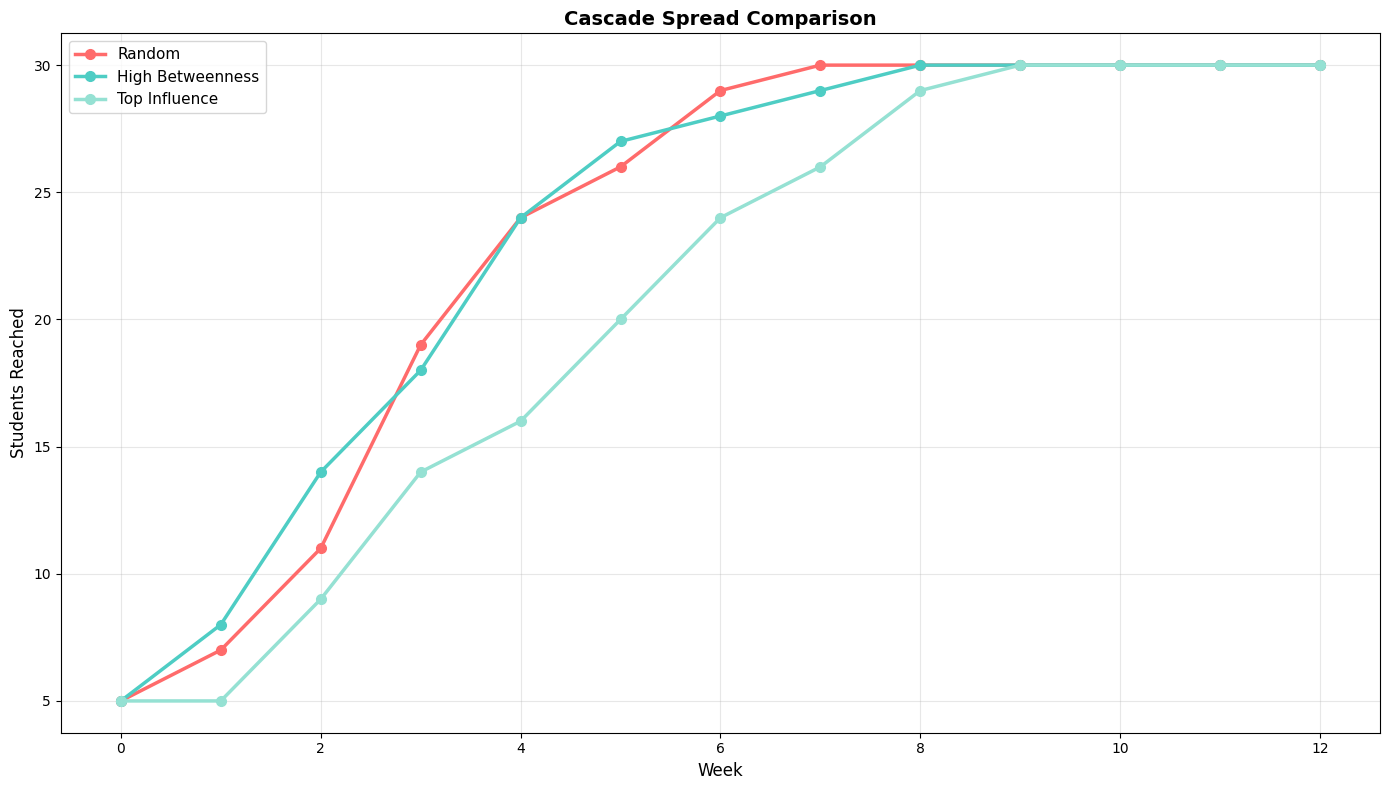

In [ ]:
# Visualize cascade spread
plt.figure(figsize=(14, 8))

colors = ['#FF6B6B', '#4ECDC4', '#95E1D3']
for (name, timeline), color in zip(strategies.items(), colors):
    weeks = list(range(13))
    counts = [len(timeline[w]) for w in weeks]
    plt.plot(weeks, counts, marker='o', linewidth=2.5, label=name, markersize=7, color=color)

plt.xlabel('Week', fontsize=12)
plt.ylabel('Students Reached', fontsize=12)
plt.title('Cascade Spread Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Final Summary

In [ ]:
print('='*80)
print('🏆 HEALTHSYNC NETWORK AI - KEY FINDINGS')
print('='*80)

print('\n1️⃣ NETWORK ANALYSIS:')
print(f'   • Total students: {G.number_of_nodes()}')
print(f'   • Total connections: {G.number_of_edges()}')
print(f'   • Communities: {len(communities)}')

print('\n2️⃣ MACHINE LEARNING:')
print(f'   • Baseline: {acc_base:.1%}')
print(f'   • Network-Enhanced: {acc_enh:.1%}')
print(f'   • Improvement: {improvement:+.1f}%')

print('\n3️⃣ CASCADE SIMULATION:')
print(f'   • Best strategy: {best["name"]}')
print(f'   • Multiplier: {best["multiplier"]:.2f}x')
print(f'   • Strategic targeting is {best["multiplier"]:.1f}x more effective!')

print('\n✅ ANALYSIS COMPLETE!')
print('='*80)

🏆 HEALTHSYNC NETWORK AI - KEY FINDINGS

1️⃣ NETWORK ANALYSIS:
   • Total students: 30
   • Total connections: 165
   • Communities: 4

2️⃣ MACHINE LEARNING:
   • Baseline: 62.5%
   • Network-Enhanced: 50.0%
   • Improvement: -20.0%

3️⃣ CASCADE SIMULATION:
   • Best strategy: Random
   • Multiplier: 6.00x
   • Strategic targeting is 6.0x more effective!

✅ ANALYSIS COMPLETE!
